## Processamento de Linguagem Natural

In [1]:
# Data from github
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]

#### Núvem de Palavras

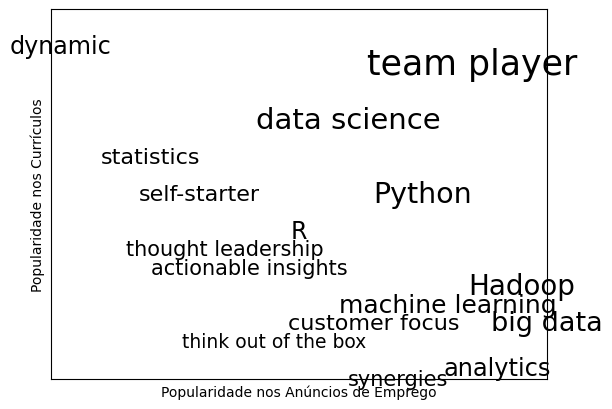

In [3]:
import matplotlib.pyplot as plt

def text_size(total: int) -> float:
    """é igual a 8 se o total for 0, 28 se o total for 200"""
    return 8 + total / 200 * 20

for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word, ha='center', va='center', size=text_size(job_popularity + resume_popularity))

plt.xlabel("Popularidade nos Anúncios de Emprego")
plt.ylabel("Popularidade nos Currículos")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.show()

#### Modelos de Linguagem n-Gram

In [10]:

import re
from bs4 import BeautifulSoup
import requests

def fix_unicode(text: str) -> str:
    return text.replace(u"\u2019", "'")

url = 'https://www.oreilly.com/ideas/what-is-data-science'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

content = soup.find("div", "post-radar-content")
regex = r"[\w']+|[\.]"

document = []

for paragraph in content('p'):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)

In [18]:
from collections import defaultdict
import random

transitions = defaultdict(list)

for prev, current in zip(document, document[1:]):
    transitions[prev].append(current)

def generate_using_bigrams() -> str:
    current = "."                                       # isso indica que a próxima palavra iniciará uma frase
    result = []
    
    while True:
        next_word_candidates = transitions[current]     # bigrams (current, _)
        current = random.choice(next_word_candidates)   # escolha uma aleatoriamente
        result.append(current)                          # acrescente o valor aos resultados

        if current == ".": return ' '.join(result)             # indica o fim

generate_using_bigrams()

'Try using photos from it complements them into a number of Hal Varianâ s available and a camera and reliability requirements of creating the space you have built a distributed across many large snakes .'

In [23]:
# Gerando trigrams
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in zip(document, document[1:], document[2:]):
    if prev == '.': starts.append(current)

    trigram_transitions[(prev, current)].append(next)

def generate_using_trigrams() -> str:
    current = random.choice(starts)         # escolha uma palavra inicial aleatória
    prev = "."                              # e coloque um "." antes dela
    result = [current]

    while True:
        next_word_cadidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_cadidates)

        prev, current = current, next_word
        result.append(current)

        if current == ".":
            return ' '.join(result)

generate_using_trigrams()

'No one in the wild and data scientists are involved with gathering data massaging it into a single set of operations fails .'

#### Gramática

In [4]:
from typing import List, Dict

# digite o alias para se referir às gramáticas depois
Grammar = Dict[str, List[str]]

grammar = {
    "_S"  : ["_NP _VP"],
    "_NP" : ["_N",
             "_A _NP _P _A _N"],
    "_VP" : ["_V",
             "_V _NP"],
    "_N"  : ["data science", "Python", "regression"],
    "_A"  : ["big", "linear", "logistic"],
    "_P"  : ["about", "near"],
    "_V"  : ["learns", "trains", "tests", "is"]
}

def is_terminal(token: str) -> bool:
    return token[0] != '_'

In [35]:
def expand(grammar: Grammar, tokens: List[str]) -> List[str]:
    for i, token in enumerate(tokens):
        # If this is a terminal token, skip it.
        if is_terminal(token): continue

        # Otherwise, it's a non-terminal token,
        # so we need to choose a replacement at random.
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            # Replacement could be e.g. "_NP _VP", so we need to
            # split it on spaces and splice it in.
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]

        # Now call expand on the new list of tokens.
        return expand(grammar, tokens)

    # If we get here we had all terminals and are done
    return tokens

def generate_sentence(grammar: Grammar) -> List[str]:
    return expand(grammar, ["_S"])

In [37]:
generate_sentence('_S')

TypeError: string indices must be integers, not 'str'

### Um Aparte: Amostragem de Gibbs

In [43]:
from typing import Tuple
import random

def roll_a_die() -> int:
    return random.choice([1, 2, 3, 4, 5, 6])

def direct_sample() -> Tuple[int, int]:
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

def random_y_given_x(x: int) -> int:
    """é bem provável que seja x + 1, x + 2, ..., x + 6"""
    return x + roll_a_die()

def random_x_given_y(y: int) -> int:
    if y <= 7:
        # se o total for menor ou igual 7 ou menos, é provável que o primeiro dado seja 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # se o total for maior ou igual a 7, é bom provável que o primeiro dado seja (total - 6), (total - 5) ... 6
        return random.randrange(y - 6, 7)

def gibbs_sample(num_iters: int = 100) -> Tuple[int, int]:
    x, y = 1, 2 # nao importa
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)

    return x, y

In [44]:
def compare_distribuitions(num_samples: int = 1000) -> Dict[int, List[int]]:
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[gibbs_sample()][1] += 1

    return counts

compare_distribuitions()

defaultdict(<function __main__.compare_distribuitions.<locals>.<lambda>()>,
            {(2, 8): [27, 27],
             (4, 8): [28, 25],
             (3, 6): [29, 22],
             (3, 7): [24, 33],
             (5, 11): [33, 23],
             (1, 6): [31, 33],
             (3, 4): [27, 32],
             (1, 7): [26, 26],
             (3, 5): [28, 22],
             (6, 10): [28, 23],
             (6, 12): [33, 26],
             (4, 5): [36, 32],
             (1, 2): [26, 20],
             (2, 5): [28, 34],
             (4, 10): [38, 34],
             (4, 7): [28, 23],
             (4, 9): [29, 27],
             (5, 8): [25, 35],
             (5, 10): [22, 24],
             (2, 7): [27, 23],
             (5, 9): [29, 24],
             (6, 9): [31, 25],
             (2, 6): [30, 29],
             (5, 6): [30, 31],
             (6, 11): [19, 32],
             (1, 3): [27, 29],
             (3, 8): [29, 33],
             (6, 8): [20, 29],
             (1, 4): [25, 24],
             (2, 4)

### Modelagem de Tópicos

In [9]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

In [7]:
from typing import Counter, List
import random


def sample_from(weights: List[float]) -> int:
    """retorna i com probabilidade weights[i] / sum(weights)"""
    total = sum(weights)
    rnd = total * random.random()       # uniforme entre 0 e total
    for i, w in enumerate(weights):
        rnd -= w                        # retorna o menor i tal que
        if rnd <= 0: return i           # weights[0] + ... + weights[i] >= rnd


In [8]:
# Execute 1000 vezes e conte
draws = Counter(sample_from([0.1, 0.1, 0.8]) for _ in range(1000))

assert 10 < draws[0] < 190 
assert 10 < draws[1] < 190 
assert 650 < draws[2] < 950 

assert draws[0] + draws[1] + draws[2] == 1000

In [15]:
# quantidade de tópicos 
K = 4

# quantas vezes cada tópico é atribuído para cada documento?
# uma lista de Counter, um para cada documento
document_topic_counts = [Counter() for _ in documents]

# quantas vezes cada palavra é atribuída a cada topico?
# uma lista de Counter, um para cada tópico
topic_word_counts = [Counter() for _ in range(K)]

# o número total de palavras atribuídas a cada tópico
# uma lista de números, um para cada tópico
topic_counts = [0 for _ in range(K)]

# o número total de palavras contidas em cada documento
# uma lista de números, um para cada documento
document_lengths = [len(document) for document in documents]

# o número de palavras distintas
distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

# o número de documentos
D = len(documents)

In [12]:
document_topic_counts[3][1]

0

In [13]:
topic_words_counts[2]['nlp']

0

In [16]:
def p_topic_given_document(topic: int, d: int, alpha: float = 0.1) -> float:
    """
    A fração de palavras no documento 'd' atribuídas ao 'tópico' (mais a suavização)
    """
    return ((document_topic_counts[d][topic] + alpha) / (document_lengths[d] + K * alpha))

def p_word_given_topic(word: str, topic: int, beta: float = 0.1) -> float:
    """
    A fração de palavras atribuídas ao 'tópico' iguais a 'palavra' (mais a suavização).
    """
    return ((topic_word_counts[topic][word] + beta) / (topic_counts[topic] + W * beta))

def topic_weight(d: int, word: str, k: int) -> float:
    """
    Para um certo documento e uma certa palavra nesse documento, retorne o peso do tópico k
    """
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d: int, word: str) -> int:
    return sample_from([topic_weight(d, word, k) for k in range(K)])

In [19]:
# Pra começar, vamos atribuir cada palavra a um tópico aleatório

random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [20]:

import tqdm

for iter in tqdm.trange(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d], document_topics[d])):
            # remova esta palavra/ tópico das contagens para que não influencie os pesos
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][d] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # escolha um novo tópico com base nos pesos
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # e agora o adicione novamente as contagens
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

100%|██████████| 1000/1000 [00:01<00:00, 668.56it/s]


In [22]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0:
            print(k, word, count)

0 R 2115
0 Java 2029
0 Python 1146
0 HBase 1018
0 Cassandra 1015
0 Haskell 1001
0 Spark 1000
0 Storm 1000
0 programming languages 1000
0 Hadoop 993
0 C++ 992
0 support vector machines 976
0 Big Data 972
0 statsmodels 901
0 libsvm 883
0 regression 867
0 statistics 810
0 pandas 134
0 scikit-learn 7
0 artificial intelligence 5
0 numpy 2
0 scipy 1
1 scikit-learn 1995
1 pandas 1173
1 Python 1138
1 statsmodels 1079
1 Postgres 1047
1 MongoDB 1044
1 HBase 1030
1 machine learning 1026
1 neural networks 1005
1 Mahout 1001
1 databases 1001
1 MySQL 1001
1 numpy 999
1 scipy 997
1 deep learning 9
1 Cassandra 4
1 theory 2
1 decision trees 1
1 Big Data 1
2 statistics 2190
2 regression 2136
2 probability 2003
2 R 1883
2 Python 1705
2 libsvm 1115
2 mathematics 1001
2 decision trees 1000
2 theory 999
2 NoSQL 997
2 Cassandra 983
2 machine learning 975
2 MongoDB 958
2 Postgres 955
2 HBase 955
2 pandas 694
2 statsmodels 22
2 support vector machines 20
2 scipy 3
2 artificial intelligence 3
2 Java 2
2 C++ 1
2

In [24]:
topic_names = ["Big Data and programing languages",
               "Python and statistics",
               "databases",
               "machine learning"]

for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic,count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
Big Data and programing languages 7
['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
databases 5
['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Python and statistics 6
['R', 'Python', 'statistics', 'regression', 'probability']
databases 4
Big Data and programing languages 1
['machine learning', 'regression', 'decision trees', 'libsvm']
databases 4
['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
Big Data and programing languages 6
['statistics', 'probability', 'mathematics', 'theory']
databases 4
['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
Python and statistics 4
['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
machine learning 4
['Hadoop', 'Java', 'MapReduce', 'Big Data']
machine learning 4
['statistics', 'R', 'statsmodels']
Big Data and programing languages 2
databases 1
['C++', 'deep learning', 'artificial intelligence

#### Vetores de Palavras

In [13]:
import import_ipynb
from linear_algebra import dot, Vector
import random
import math

def cousine_similarity(v1: Vector, v2: Vector) -> float:
    return dot(v1, v2) / math.sqrt(dot(v1, v1) * dot(v2,v2))

assert cousine_similarity([1., 1, 1], [2., 2, 2]) == 1      # mesma direção
assert cousine_similarity([-1, -1], [2., 2]) == -1          # direção oposta
assert cousine_similarity([1., 0], [0., 1]) == 0            # ortogonal

In [14]:
colors = ["vermelho", "verde", "azul", "amarelo", "preto", ""]
nouns = ["cama", "carro", "barco", "gato"]
verbs = ["é", "foi", "parece"]
adverbs = ["muito", "quieto", "extremamente", ""]
adjectives = ["devagar", "rápido", "macio", "áspero"]


def make_sentence() -> str:
    return ' '.join([
        "O",
        random.choice(nouns),
        random.choice(colors),
        random.choice(verbs),
        random.choice(adverbs),
        random.choice(adjectives)
    ])

NUM_SENTENCES = 50

random.seed(0)

sentences = [make_sentence() for _ in range(NUM_SENTENCES)]

sentences

['O gato amarelo é extremamente áspero',
 'O gato azul foi extremamente rápido',
 'O carro azul é muito macio',
 'O carro azul é muito macio',
 'O gato preto é extremamente áspero',
 'O barco preto parece quieto áspero',
 'O gato preto foi muito devagar',
 'O cama  foi muito áspero',
 'O barco verde parece extremamente devagar',
 'O carro preto é quieto rápido',
 'O gato vermelho é extremamente áspero',
 'O cama azul parece extremamente devagar',
 'O barco preto é extremamente áspero',
 'O cama preto foi extremamente rápido',
 'O barco verde é quieto devagar',
 'O barco amarelo é muito rápido',
 'O carro vermelho é  macio',
 'O carro verde parece  macio',
 'O gato amarelo parece extremamente devagar',
 'O barco preto é  macio',
 'O carro verde é extremamente devagar',
 'O carro azul é extremamente áspero',
 'O cama vermelho é quieto devagar',
 'O cama vermelho é quieto devagar',
 'O gato vermelho foi muito devagar',
 'O cama verde é muito áspero',
 'O carro  é muito áspero',
 'O cama a

In [39]:
from deep_learning import Tensor

In [5]:
class Vocabulary:
    def __init__(self, words: List[str] = None) -> None:
        self.w2i: Dict[str, int] = {}           # mapeamento palava  -> word_id
        self.i2w: Dict[int, str] = {}           # mapeamento word_id -> palavra

        for word in (words or []):              # se houver palavras
            self.add(word)                      # adicione-as.

    @property
    def size(self) -> int:
        """há quantas palavras no vocabulário"""
        return len(self.w2i)

    def add(self, word: str) -> None:
        if word not in self.w2i:                # se a palavra for nova:
            word_id = len(self.w2i)             # encontre o próximo ID.
            self.w2i[word] = word_id            # Adicione ao mapa palavra -> word_id.
            self.i2w[word_id] = word            # Adicione ao mapa word_id -> palavra.

    def get_id(self, word: str) -> int:
        """retorne o id da palavra (ou None)"""
        return self.w2i.get(word)

    def get_word(self, word_id: int) -> str:
        """retorne a palavra com o id fornecido (ou None)"""
        return self.i2w.get(word_id)

    def one_hot_encode(self, word: str) -> Tensor:
        word_id = self.get_id(word)
        assert word_id is not None, f"unknown word {word}"
        
        return [1.0 if i == word_id else 0.0 for i in range(self.size)]

vocab = Vocabulary(['a', 'b', 'c'])
assert vocab.size == 3
assert vocab.get_id('b') == 1
assert vocab.one_hot_encode('b') == [0, 1, 0]
assert vocab.get_id('z') is None
assert vocab.get_word(2) == "c"
vocab.add('z')
assert vocab.size == 4
assert vocab.get_id("z") == 3
assert vocab.one_hot_encode('z') == [0, 0, 0, 1]

In [43]:
import json

def save_vocab(vocab: Vocabulary, filename: str) -> None:
    with open(filename, 'w') as file:
        json.dump(vocab.w2i, file)

def load_vocab(filename: str) -> Vocabulary:
    vocab = Vocabulary()
    with open(filename) as f:
        # Carregue o w2i e gere o w2i a partir dele
        vocab.w2i = json.load(f)
        vocab.i2w = {id: word for word, id in vocab.w2i.items()}
    return vocab

importing Jupyter notebook from deep_learning.ipynb
importing Jupyter notebook from neural_networks.ipynb
importing Jupyter notebook from linear_algebra.ipynb
importing Jupyter notebook from gradient_descent.ipynb
importing Jupyter notebook from probability.ipynb
importing Jupyter notebook from machine_learning.ipynb


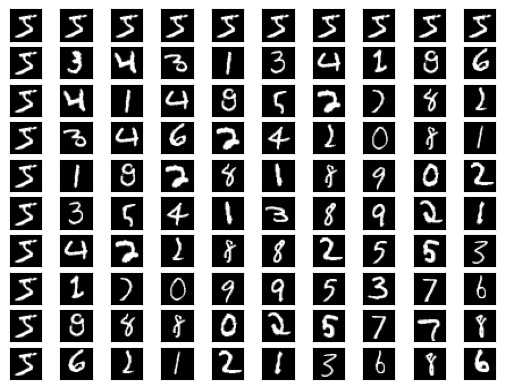

In [2]:
import import_ipynb
from typing import Iterable
from deep_learning import Layer, Tensor, random_tensor, zeros_like

In [7]:
class Embedding(Layer):
    def __init__(self, num_embeddings: int, embedding_dim: int) -> None:
        self.num_embeddings = num_embeddings
        self.embedding_dim = embedding_dim

        # um vetor de tamanho embedding_dim para cada incorporação desejada
        self.embeddings = random_tensor(num_embeddings, embedding_dim)
        self.grad = zeros_like(self.embeddings)

        # salve o ID da última entrada
        self.last_input_id = None

    def forward(self, input_id: int) -> Tensor:
        """basta selecionar o vetor de incorporação correspondente ao id da entrada"""
        self.input_id = input_id            # lembre-se para usar na retropropagação

        return self.embeddings[input_id]
    
    def backward(self, gradient: Tensor) -> None:
        # Zere o gradiente correspondente à última entrada.
        # Isso é muito mais barato do que criar um tensor sempre que necessário.
        if self.last_input_id is not None:
            zero_row = [0 for _ in range(self.embedding_dim)]
            self.grad[self.last_input_id] = zero_row

        self.last_input_id = self.input_id
        self.grad[self.input_id] = gradient

    def params(self) -> Iterable[Tensor]:
        return [self.embeddings]

    def grads(self) -> Iterable[Tensor]:
        return [self.grad]        

In [27]:
from typing import Tuple

class TextEmbedding(Embedding):
    def __init__(self, vocab: Vocabulary, embedding_dim: int) -> None:
        # Chame o construtor da superclasse
        super().__init__(vocab.size, embedding_dim)

        self.vocab = vocab

    def _getitem_(self, word: str) -> Tensor:
        word_id = self.vocab_get_id(word)
        if word_id is not None:
            return self.embeddings[word_id]
        else:
            return None

    def closest(self, word: str, n: int = 5) -> List[Tuple[float, str]]:
        """Retorna as n palavras mais próximas com base na semelhança dos cossenos"""
        vector = self[word]

        # Compute os pares (semelhança, other_word) e indique o mais semelhante
        scores = [(cousine_similarity(vector, self.embeddings[i]), other_word) for other_word, i in self.vocab.w2i.items()]
        scores.sort(reverse=True)

        return scores[:n]
    

In [23]:
import re

# este não é um ótimo regex, mas funciona com esses dados.
tokenized_sentences = [re.findall("[a-z]+|[.]", sentence.lower()) for sentence in sentences]

# Crie um vocabulário (ou seja, um mapeamento palavra -> word_id) com base no texto.
vocab = Vocabulary(word for sentence_word in tokenized_sentences for word in sentence_word)
vocab

In [24]:
# Agora criamos os dados de treinamento
from deep_learning import one_hot_encode, Tensor

inputs: List[int] = []
targets: List[Tensor] = []

for sentence in tokenized_sentences:
    for i, word in enumerate(sentence):                 # Para cada palavra
        for j in [i - 2, i - 1, i + 1, i + 2]:          # analise os locais próximos
            if 0 <= j < len(sentence):                  # que não estejam fora dos limites
                nearby_word = sentence[j]               # e obtenha essa palavras

                # Adicione uma entrada com word_id original
                inputs.append(vocab.get_id(word))

                # Adicione um destino que seja os destinos das palavras próximas codificadas em one hot.
                targets.append(vocab.one_hot_encode(nearby_word))

In [28]:
from deep_learning import Sequential, Linear

random.seed(0)
EMBEDDING_DIM = 5

# Defina a camada de incorporação separadamente para que ela seja referenciada depois.
embedding = TextEmbedding(vocab = vocab, embedding_dim=EMBEDDING_DIM)

model = Sequential([
    # Para uma determinada palavra (como um vetor de word_id), procure sua incorporação.
    embedding,
    # E use a camada linear para calcular as pontuações das "palavras próximas".
    Linear(input_dim=EMBEDDING_DIM, output_dim=vocab.size)
])

from deep_learning import SoftmaxCrossEntropy, Momentum, GradientDescent

loss = SoftmaxCrossEntropy()
optimizer = GradientDescent(learning_rate=0.01)

for epoch in range(100):
    epoch_loss = 0.0
    for input, target in zip(inputs, targets):
        predicted = model.forward(input)
        epoch_loss += loss.loss(predicted, target)
        gradient = loss.gradient(predicted, target)
        model.backward(gradient)
        optimizer.step(model)

    print(epoch, epoch_loss)                    # Imprima a perda
    print(embedding.closest("preto"))           # e também algumas das palavras mais próximas
    # print(embedding.closest("devagar"))         # para verificar o que está sendo
    # print(embedding.closest("carro"))           # aprendido.

0 2352.533355624412


TypeError: 'TextEmbedding' object is not subscriptable